In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [2]:
df_diabetes = pd.read_csv("diabetes.csv")

In [3]:
colunas = list( df_diabetes.columns )
colunas

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [5]:
df_diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
len(df_diabetes.columns)

9

In [6]:
len(df_diabetes)

768

In [7]:
df_corr = df_diabetes.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [77]:
fig = px.imshow(df_corr)
fig.show()

In [9]:
degrade_laranja = ['rgb(248, 201, 151)', 'rgb(250, 192, 132)', 'rgb(251, 179, 105)', 'rgb(253, 151, 49)', 'rgb(254, 142, 29)', 'rgb(255, 128, 0)']

In [15]:
#https://plotly.com/python/annotated-heatmap/

colorscale = [[0, 'navy'], [0.7, 'plum'], [1, 'plum']]
colorscale = [[0, 'rgb(250, 192, 132)'], [0.5, 'rgb(253, 151, 49)'], [1, 'rgb(255, 128, 0)']]

font_colors = ['black'] # ['white', 'black']
fig = ff.create_annotated_heatmap(
    df_corr.values.round(2), 
    colorscale=colorscale, 
    font_colors=font_colors,
    x=colunas,
    y=colunas
)
fig.show()

In [8]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [36]:
df_diabetes_n = df_diabetes.loc[:, columns[:-1]]

In [37]:
for c in df_diabetes_n.columns:
    max_value = df_diabetes_n.loc[:, c].max()
    df_diabetes_n.loc[:, c] = df_diabetes_n.loc[:, c] / max_value

In [60]:
px.box(df_diabetes.loc[:, columns[:-1]], points='all', labels={'value':'Valor', 'variable':'Coluna'})

In [59]:
px.box(df_diabetes_n, points='all', labels={'value':'Valor Normalizado', 'variable':'Coluna'})

In [36]:
df_diabetes.Insulin.value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [53]:
px = 0.026458333
px * 872, px * 252, (px * 252)/(px * 872)

(23.071666376, 6.667499916000001, 0.28899082568807344)

In [55]:
15*0.28

4.2

### Null Values 

In [12]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [44]:
df_zero = pd.DataFrame(columns = ['Coluna', 'Zeros', 'Porcentagem %', 'Média', 'Mediana', 'Moda'])
for i,column in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']):
    print(column, df_diabetes.loc[ df_diabetes[column] == 0, column ].count())
    count = df_diabetes.loc[ df_diabetes[column] == 0, column ].count()
    mean = df_diabetes.loc[ df_diabetes[column] != 0, column ].mean()
    median = df_diabetes.loc[ df_diabetes[column] != 0, column ].median()
    mode = df_diabetes.loc[ df_diabetes[column] != 0, column ].mode()[0]
    df_zero.loc[i] = [column, 
                      count,
                      round((count/len(df_diabetes))*100,2),
                      mean,
                      median,
                      mode]

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


In [45]:
df_zero

,Coluna,Zeros,Porcentagem %,Média,Mediana,Moda
0,Glucose,5,0.65,121.686763,117.0,99
1,BloodPressure,35,4.56,72.405184,72.0,70
2,SkinThickness,227,29.56,29.153420,29.0,32
3,Insulin,374,48.70,155.548223,125.0,105
4,BMI,11,1.43,32.457464,32.3,32


### Gráficos 

In [59]:
total = [ len(df_diabetes) ]
diabetes = list( df_diabetes.Outcome.value_counts() )

In [60]:
faixas_idade = [ str(i+1)+' a '+str(i+15) for i in range(20, 80, 15) ]
faixas_idade

['21 a 35', '36 a 50', '51 a 65', '66 a 80']

In [61]:
total, diabetes

([768], [500, 268])

In [62]:
df_diabetes[ df_diabetes["SkinThickness"] == 0 ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [63]:
faixas_glucose = [ [0,90], [91, 105], [106, 120], [121, 140], [141, 160], [161, 200] ]

In [64]:
faixa_glusoce_dbtc = [0, 0, 0, 0, 0, 0]
for row in df_diabetes[ df_diabetes.Outcome == 1 ].itertuples():
    for i,intervalo in enumerate(faixas_glucose):
        if intervalo[0] <= row.Glucose <= intervalo[1]:
            faixa_glusoce_dbtc[i] += 1

In [65]:
faixa_glusoce_dbtc, sum(faixa_glusoce_dbtc), diabetes[1]

([9, 23, 41, 63, 49, 83], 268, 268)

In [66]:
faixa_glusoce_ndbtc = [0, 0, 0, 0, 0, 0]
for row in df_diabetes[ df_diabetes.Outcome == 0 ].itertuples():
    for i,intervalo in enumerate(faixas_glucose):
        if intervalo[0] <= row.Glucose <= intervalo[1]:
            faixa_glusoce_ndbtc[i] += 1

In [67]:
faixa_glusoce_ndbtc, sum(faixa_glusoce_ndbtc), diabetes[0]

([106, 126, 114, 94, 42, 18], 500, 500)

In [68]:
# DEGRADE MAIS FRACO AO MAIS FORTE
degrade_roxo = ['rgb(133, 61, 181)', 'rgb(144, 79, 184)', 'rgb(151, 90, 186)', 'rgb(161, 106, 189)', 'rgb(170, 120, 191)', 'rgb(184, 142, 196)']
degrade_amarelo = ['rgb(248, 246, 195)', 'rgb(249, 246, 171)', 'rgb(252, 245, 143)', 'rgb(252, 244, 115)', 'rgb(254, 243, 84)', 'rgb(255, 243, 75)']
degrade_laranja = ['rgb(248, 201, 151)', 'rgb(250, 192, 132)', 'rgb(251, 179, 105)', 'rgb(253, 151, 49)', 'rgb(254, 142, 29)', 'rgb(255, 128, 0)']

cor_vermelha = 'rgb(255,  75, 99)'
cor_azul = 'rgb(75, 123, 255)'
cor_azul2 ='rgb(31, 119, 180)'
cor_amarela = 'rgb(255, 243, 75)'

In [69]:
trace1 = go.Pie(
    hole=0.3, # .7
    sort=False,
    direction='clockwise',
    values= diabetes, # [500, 268] diabetes
    labels=["Sem Diabetes", "Com Diabetes"],
    textinfo='value + percent', #'<br>' #Any combination of ['label', 'text', 'value', 'percent'] joined with '+'
    textposition= 'inside', #'inside', 'auto' 'outside'
    marker={'colors': [ cor_azul, cor_vermelha ], # rgb(31, 119, 180) == #1f77b4
            'line': {'color': 'black', 'width': 1.0}}
)

In [70]:
trace2 = go.Pie(
    hole=0.55, #.2
    sort=False,
    direction='clockwise',
    values= faixa_glusoce_ndbtc+faixa_glusoce_dbtc,
    labels= [ 'ND '+str(f).replace("[","").replace("]","") for f in faixas_glucose ]+[ 'D '+str(f).replace("[","").replace("]","") for f in faixas_glucose ],
    textinfo='label + value',
    #textinfo='label + percent + value',
    #pull = [0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0.1], # empurra uma fatia para frente
    textposition='outside',
    marker={'colors': degrade_laranja*2,
            'line': {'color': 'black', 'width': 1.5}}
)

In [71]:
fig = go.Figure(data=[trace1, trace2])
#fig = fig.full_figure_for_development(warn=False)
fig.update_layout(width = 900, height=650)
fig.data[0].domain = {'x': [0, 1], 'y': [0.22, 0.78]}
fig.show()

In [50]:
(83)/268, (18)/500

(0.30970149253731344, 0.036)

In [52]:
83/(83+18), (83+18)

(0.8217821782178217, 101)

In [73]:
# 0 - 105
nd = 106+126
db = 9+23
db/(db+nd), db, nd

(0.12121212121212122, 32, 232)

In [21]:
'''
6 partes

RGB => HEX / HEX => RGB
https://www.rapidtables.com/convert/color/hex-to-rgb.html
   
Degrade
https://cssgradient.io

Triangulação de Cores
https://www.sessions.edu/color-calculator/

Como doentes veem cores
https://davidmathlogic.com/colorblind/
''';

### HEAD 

In [74]:
df_diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Classificadores 

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

### Métricas 

In [5]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### Boosting e Hiper-Parametrização

In [6]:
from sklearn.model_selection import GridSearchCV

### Graficos e Vizualização 

In [10]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [11]:
'''
https://scikit-learn.org/stable/modules/cross_validation.html#repeated-k-fold

run KFold n times (n_repeats), producing different splits (n_splits) in each repetition.
''';

In [21]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [22]:
model = GradientBoostingClassifier()

In [23]:
X = df_diabetes.loc[:, 'Pregnancies':'Age']
y = df_diabetes.loc[:, 'Outcome']

In [24]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [25]:
n_scores

array([0.75324675, 0.81818182, 0.74025974, 0.81818182, 0.77922078,
       0.81818182, 0.75324675, 0.74025974, 0.80263158, 0.69736842,
       0.68831169, 0.75324675, 0.66233766, 0.77922078, 0.71428571,
       0.79220779, 0.72727273, 0.77922078, 0.76315789, 0.75      ,
       0.68831169, 0.76623377, 0.76623377, 0.7012987 , 0.84415584,
       0.72727273, 0.72727273, 0.75324675, 0.77631579, 0.82894737])

In [26]:
np.mean(n_scores), np.std(n_scores)

(0.7569776714513556, 0.04456605827452958)

In [34]:
cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)

array([0.58333333, 0.74074074, 0.64285714, 0.75      , 0.63829787,
       0.69565217, 0.6122449 , 0.62745098, 0.69387755, 0.56603774,
       0.56603774, 0.6122449 , 0.45833333, 0.64      , 0.54166667,
       0.69090909, 0.60377358, 0.65217391, 0.57142857, 0.6122449 ,
       0.55555556, 0.65384615, 0.67924528, 0.56603774, 0.8       ,
       0.55319149, 0.53333333, 0.6122449 , 0.65306122, 0.75471698])

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

array([0.80296296, 0.85111111, 0.79851852, 0.87703704, 0.85777778,
       0.90740741, 0.84222222, 0.77925926, 0.88153846, 0.73692308,
       0.78962963, 0.81555556, 0.80074074, 0.88740741, 0.80518519,
       0.83111111, 0.77407407, 0.88074074, 0.79192308, 0.80846154,
       0.75037037, 0.85185185, 0.86518519, 0.82518519, 0.90444444,
       0.79851852, 0.84518519, 0.78222222, 0.84153846, 0.87923077])

In [36]:
model.fit(X, y)

GradientBoostingClassifier()

In [37]:
exemplo_teste = pd.DataFrame( [list(X.iloc[0, :].values)], columns=colunas[:-1])
exemplo_teste

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0


In [38]:
model.predict( exemplo_teste )

array([1], dtype=int64)

In [39]:
list_predicted = model.predict( X )

In [40]:
list_predicted[:10]

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [41]:
np.array( y[:10] )

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

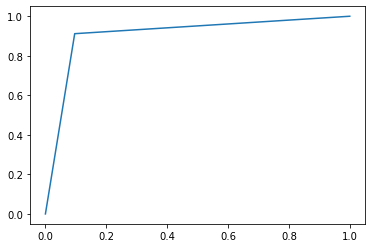

In [42]:
fpr, tpr, _ = metrics.roc_curve(list_predicted,  y)
plt.plot(fpr,tpr)

## MODELOS CLÁSSICOS 

### SVC - Support Vector Classifier

In [44]:
from sklearn.svm import SVC

In [45]:
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

In [46]:
model_svc = svc.fit(X, y)

In [47]:
list_predicted_svc = model_svc.predict( X )

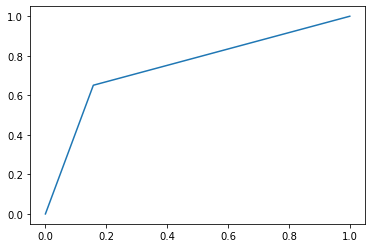

In [48]:
fpr_svc, tpr_svc, _ = metrics.roc_curve(list_predicted_svc,  y)
plt.plot(fpr_svc, tpr_svc);

#### KFold - Croos Vall Score

In [58]:
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

In [50]:
cross_val_score(model_svc, X, y, scoring='f1', cv=cv, n_jobs=-1)

array([0.66666667, 0.7       , 0.65625   , 0.73333333, 0.79245283,
       0.75      , 0.66666667, 0.61016949, 0.70588235, 0.48148148,
       0.61016949, 0.74576271, 0.64150943, 0.67924528, 0.6       ,
       0.68852459, 0.62686567, 0.71428571, 0.62962963, 0.75      ])

In [51]:
cross_val_score(model_svc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

array([0.77922078, 0.76623377, 0.71428571, 0.79220779, 0.85714286,
       0.84415584, 0.74025974, 0.7012987 , 0.80263158, 0.63157895,
       0.7012987 , 0.80519481, 0.75324675, 0.77922078, 0.74025974,
       0.75324675, 0.67532468, 0.79220779, 0.73684211, 0.81578947])

In [53]:
l = [0.77922078, 0.76623377, 0.71428571, 0.79220779, 0.85714286, 0.84415584, 0.74025974, 0.7012987 , 0.80263158, 0.63157895, 0.7012987 , 0.80519481, 0.75324675, 0.77922078, 0.74025974, 0.75324675, 0.67532468, 0.79220779, 0.73684211, 0.81578947]
np.mean(l), np.std(l)

(0.7590823649999999, 0.054944163000100965)

In [54]:
'''
In SVC, if the data is unbalanced (e.g. many positive and few negative), 
set class_weight='balanced' and/or try different penalty parameters C.
''';

#### GridSearchCV 

In [55]:
grid_svc = dict()
grid_svc['kernel'] = ['linear', 'rbf', 'polynomial', 'sigmoid']
grid_svc['C'] = [0.1, 0.5, 1, 5, 10, 100]
grid_svc['gamma'] = [0.01, 0.5, 1.0, 10, 100]
grid_svc['class_weight'] = ['balanced']

model = SVC()

In [56]:
grid_search = GridSearchCV(estimator=model, param_grid=grid_svc, n_jobs=-1, cv=cv, scoring='accuracy')

grid_result = grid_search.fit(X, y)

C:\Users\flavio.sousa\AppData\Local\Continuum\anaconda2\envs\py37\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning:

One or more of the test scores are non-finite: [0.75584416 0.41339713        nan 0.41209843 0.75584416 0.41209843
        nan 0.41209843 0.75584416 0.41209843        nan 0.41209843
 0.75584416 0.41209843        nan 0.41209843 0.75584416 0.41209843
        nan 0.41209843 0.76039815 0.64188312        nan 0.41209843
 0.76039815 0.65105947        nan 0.41209843 0.76039815 0.65105947
        nan 0.41209843 0.76039815 0.65105947        nan 0.41209843
 0.76039815 0.65105947        nan 0.41209843 0.75908237 0.6411825
        nan 0.41209843 0.75908237 0.65105947        nan 0.41209843
 0.75908237 0.65105947        nan 0.41209843 0.75908237 0.65105947
        nan 0.41209843 0.75908237 0.65105947        nan 0.41209843
 0.75911654 0.6411825         nan 0.54651401 0.75911654 0.65105947
        nan 0.65105947 0.75911654 0.65105947        nan 0.65105947
 0.75911654 

In [57]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.755844 (0.050851) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'linear'}
0.413397 (0.122309) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'polynomial'}
0.412098 (0.122898) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'sigmoid'}
0.755844 (0.050851) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.5, 'kernel': 'linear'}
0.412098 (0.122898) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.5, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.5, 'kernel': 'polynomial'}
0.412098 (0.122898) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.5, 'kernel': 'sigmoid'}
0.755844 (0.050851) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 1.0, 'kernel': 'linear'}
0.412098 (0.122898) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 1.0, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1

### Regressão Logística

In [59]:
from sklearn import linear_model

In [60]:
logistic = linear_model.LogisticRegression()

In [85]:
# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty, max_iter=[10000, 100000, 1000000]) #max_iter default is 1000

In [82]:
clf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)

In [83]:
best_conf_rl = clf.fit(X, y)

In [84]:
means = best_conf_rl.cv_results_['mean_test_score']
stds = best_conf_rl.cv_results_['std_test_score']
params = best_conf_rl.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.773479 (0.035748) with: {'C': 1.0, 'max_iter': 10000, 'penalty': 'l2'}
0.773479 (0.035748) with: {'C': 1.0, 'max_iter': 100000, 'penalty': 'l2'}
0.773479 (0.035748) with: {'C': 1.0, 'max_iter': 1000000, 'penalty': 'l2'}
0.770882 (0.036178) with: {'C': 2.7825594022071245, 'max_iter': 10000, 'penalty': 'l2'}
0.770882 (0.036178) with: {'C': 2.7825594022071245, 'max_iter': 100000, 'penalty': 'l2'}
0.770882 (0.036178) with: {'C': 2.7825594022071245, 'max_iter': 1000000, 'penalty': 'l2'}
0.770882 (0.036178) with: {'C': 7.742636826811269, 'max_iter': 10000, 'penalty': 'l2'}
0.770882 (0.036178) with: {'C': 7.742636826811269, 'max_iter': 100000, 'penalty': 'l2'}
0.770882 (0.036178) with: {'C': 7.742636826811269, 'max_iter': 1000000, 'penalty': 'l2'}
0.770882 (0.036178) with: {'C': 21.544346900318832, 'max_iter': 10000, 'penalty': 'l2'}
0.770882 (0.036178) with: {'C': 21.544346900318832, 'max_iter': 100000, 'penalty': 'l2'}
0.770882 (0.036178) with: {'C': 21.544346900318832, 'max_iter': 100000

#### Curva ROC 

In [100]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [102]:
roc_auc_score(y, list_predicted_svc)

0.7579402985074627

In [103]:
roc_auc_score(list_predicted_svc, y)

0.7467799514493788

# AQUI

In [ ]:
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

grid_svc = dict()
grid_svc['kernel'] = ['linear', 'rbf', 'polynomial', 'sigmoid']
grid_svc['C'] = [0.1, 0.5, 1, 5, 10, 100]
grid_svc['gamma'] = [0.01, 0.5, 1.0, 10, 100]
grid_svc['class_weight'] = ['balanced', 'unbalanced']

model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

grid_result = grid_search.fit(X, y)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#### Normalizando Dados 

In [155]:
df_diabetes_n = df_diabetes.copy()

In [156]:
df_diabetes_n = df_diabetes_n/df_diabetes_n.max()

In [288]:
X_n = df_diabetes_n.loc[:, 'Pregnancies':'Age']
y_n = df_diabetes_n.loc[:, 'Outcome']

In [158]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [159]:
n_scores

array([0.75324675, 0.81818182, 0.74025974, 0.83116883, 0.76623377,
       0.81818182, 0.75324675, 0.74025974, 0.80263158, 0.69736842,
       0.68831169, 0.75324675, 0.66233766, 0.76623377, 0.71428571,
       0.79220779, 0.72727273, 0.77922078, 0.76315789, 0.75      ,
       0.68831169, 0.76623377, 0.75324675, 0.7012987 , 0.85714286,
       0.72727273, 0.74025974, 0.75324675, 0.77631579, 0.82894737])

In [160]:
np.mean(n_scores), np.std(n_scores)

(0.7569776714513557, 0.04556409646679444)

#### Número de Árvores 

In [164]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n)
    return models

In [165]:
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [166]:
models = get_models()

In [170]:
results, names = [], []

In [172]:
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>10 0.755 (0.041)
>50 0.763 (0.041)
>100 0.757 (0.045)
>500 0.739 (0.054)
>1000 0.728 (0.054)
>5000 0.721 (0.056)


In [178]:
from numpy import arange

In [179]:
def get_models():
    models = dict()
    # explore sample ratio from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = GradientBoostingClassifier(subsample=i, n_estimators=50)
    return models

In [180]:
results, names = [], []
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>0.1 0.746 (0.047)
>0.2 0.762 (0.045)
>0.3 0.760 (0.046)
>0.4 0.758 (0.049)
>0.5 0.760 (0.041)
>0.6 0.764 (0.042)
>0.7 0.760 (0.041)
>0.8 0.761 (0.038)
>0.9 0.762 (0.042)
>1.0 0.763 (0.041)


In [181]:
from sklearn.model_selection import GridSearchCV

In [184]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]

model = GradientBoostingClassifier()

In [185]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

In [186]:
grid_result = grid_search.fit(X, y)

In [187]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.651059 (0.003418) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.651059 (0.003418) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.651059 (0.003418) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.651059 (0.003418) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.651059 (0.003418) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.651059 (0.003418) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.651059 (0.003418) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.651059 (0.003418) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.651059 (0.003418) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.651059 (0.003418) with: {'learning_rate':

### XGBoost

In [1]:
import xgboost
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [191]:
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [192]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.741 (0.050)


In [294]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X, y)

[10:33:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [295]:
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


#### CRIANDO EXEMPLO DE TESTE PARA PREDIÇÃO 

In [296]:
exemplo_teste = pd.DataFrame( [list(X.iloc[0, :].values)], columns=colunas[:-1])
exemplo_teste

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0


In [299]:
model.predict( exemplo_teste )[0], y[0]

(1, 1)

In [ ]:
https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

### ALIMENTACAO E SAUDE 

In [303]:
peso = 84
f'''{peso*2.5}g kg pro, {peso*2}g kg carb, {peso*1}g kg gor'''

'210.0g kg pro, 168g kg carb, 84g kg gor'

In [87]:
peso = 83
f'''{peso*2.5}g kg pro, {peso*2}g kg carb, {peso*1}g kg gor'''

'207.5g kg pro, 166g kg carb, 83g kg gor'

In [89]:
peso = 83
altura = 188
idade = 22
fa = 1.6 # 5 trei + 2 card = 1.5 , frequencia de atividades
gcd = fa*(66.47+(13.75*peso)+(5*altura)-(6.8*idade))
gcd

3196.9920000000006

In [47]:
'''
Para dar um exemplo, um indivíduo de 78 Kg, 
correndo à uma velocidade de 8 Km/h estará 
gastando: 8 x 78 x 0,0175 = 10,92 Calorias por minuto. 

Uma corrida de uma hora nesta velocidade terá portanto gastado 10,92 x 60 min = 637,2 Calorias.
''';

kmH = 9
peso = 77
minutos = 25
round( kmH * peso * 0.0175 * minutos, 2 )

303.19

In [49]:
83/101

0.8217821782178217